talk about dual modality of data, 
check if there are strang trip durations
split data before finding count
.unique so that rows aren't repeated
ridge or lasso?
add comment about why start and end stations aren't the same

## Intro to Business Analytics Assignment 1

### Contributors
- Stanisław Howard, s231719
- Alexis Van den Heede, s231860
- Matthias Van Mechelen
- Sven Palac, s231799
- Salar Ravangouy Mytouei, s232038


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Trips_2018.csv')

In [3]:
df_copy = df.copy()
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [4]:
# rerun this to save time if you make a typo and need original df again
df = df_copy.copy()

In [5]:
# col 0 is unnamed, change name to trip_id convert column to index
df.rename(columns={'Unnamed: 0':'trip_id'}, inplace=True)
df.set_index('trip_id', inplace=True)
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [6]:
#  convert start time and stop time to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [7]:
# make user type dummy, get shape
df = pd.get_dummies(df, columns=['usertype'], dtype=int, drop_first=True)
print(df.shape)
df.head()


(17548339, 13)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1


In [8]:
# plotting coordinates
def plot_map(coords):
    plt.scatter(coords[:,0], coords[:,1], s=0.75)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [9]:
# get lat and long
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)



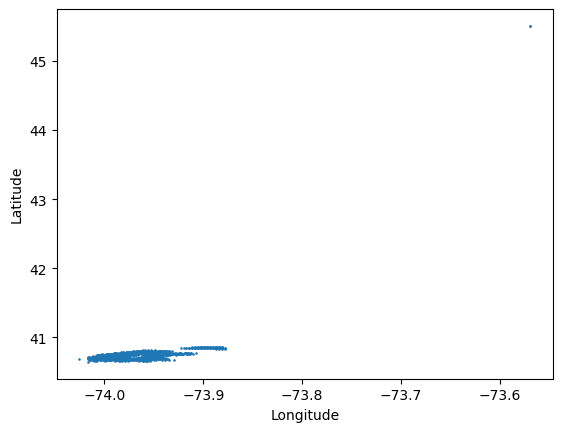

In [10]:
plot_map(coords)


Notice outlier (Canada, Montreal). quickly get rid of it to get an overview of the rest of the data. We will not yet delete the outlier datapoint from the dataframe.

In [11]:
# get rid of outlier longitude > -73.6
coords = coords[coords[:,0] < -73.6]
print(coords.shape) #shape is 917 here as it still includes the grid anomalies

(917, 2)


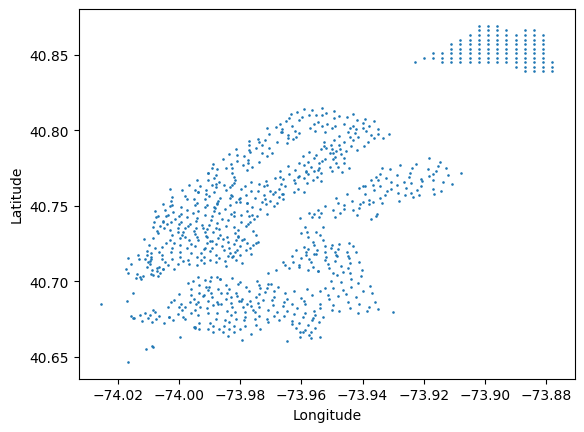

In [12]:
plot_map(coords)
# shows the unique start and end stations present in the dataset.

Notice very structured grid in top right corner. After investigation these data points were NaN's. We will rid of these data points, and at the same time we get rid of the canada outlier. 

In [13]:
# print where nan is in df, get rid of nan (= get rid of gridded outliers), create copy of df and start station coordinates
print(df.isnull().sum())
df = df[~np.isnan(df['start_station_id'])]
df = df[~np.isnan(df['end_station_id'])]
# get rid of Canada outlier
df = df[df['start_station_longitude'] < -73.6]
df = df[df['end_station_longitude'] < -73.6]
# get lat and long
coords_start = df[['start_station_longitude','start_station_latitude']].values
coords_start = np.unique(coords_start, axis=0)
coords_start_copy = coords_start.copy()
print(coords.shape)

tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
birth_year                    0
gender                        0
usertype_Subscriber           0
dtype: int64
(917, 2)


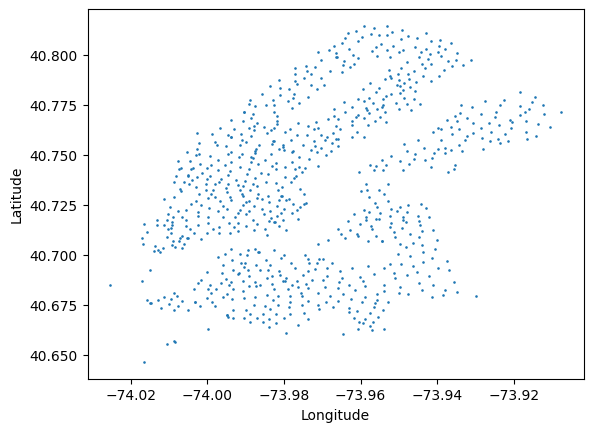

In [14]:
plot_map(coords_start)

In [15]:
# amount of distinct end stations does not match amount of start stations as seen from comparing shapes, create copy of end station coordinates.
coords_end = df[['end_station_longitude','end_station_latitude']].values
coords_end = np.unique(coords_end, axis=0)
print(coords_end.shape)
print(coords_start.shape)
coords_end_copy = coords_end.copy()


(849, 2)
(817, 2)


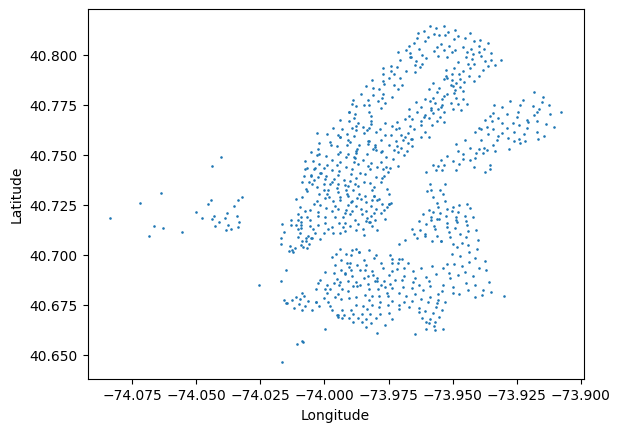

In [16]:
#what does the difference look like visually?
plot_map(coords_end)

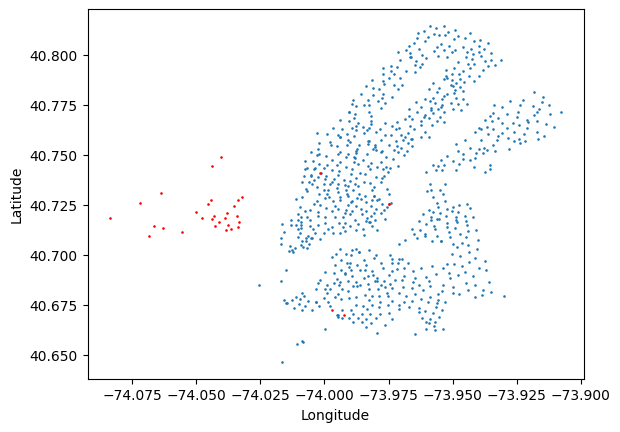

In [17]:
# highlight the end stations that are not in the start stations on the map of all en
coords_end_not_in_start = []
for i in range(len(coords_end)):
    if coords_end[i] not in coords_start:
        coords_end_not_in_start.append(coords_end[i])
coords_end_not_in_start = np.array(coords_end_not_in_start)
plt.scatter(coords_start[:,0], coords_start[:,1], s=0.75)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.scatter(coords_end_not_in_start[:,0], coords_end_not_in_start[:,1], s=0.75, c='r')
plt.show()


Since there are more end stations than start stations and all start stations are also an end station, the clustering should be done using the end stations in order to cluster every station considered in the data. 

## Part 1
Clustering the stations

In [18]:
# import kmeans
from sklearn.cluster import KMeans

In [19]:
n_clusters = 20
random_state = 0

In [20]:
# make kmeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(coords_end) # using coords here instead of df to increase speed

C:\Users\alexi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Train on coords instead of DataFrame to increase speed, then predict to save labels on df, model is trained on same data as you predict the cluster for, so the cluster they belong to will be the same one as they belonged to during convergence of the Kmeans cluster.

In [21]:
df['drop_label'] = kmeans.predict(df[['end_station_longitude','end_station_latitude']].values)
df['pick_label'] = kmeans.predict(df[['start_station_longitude','start_station_latitude']].values)
df_copy2 = df.copy()


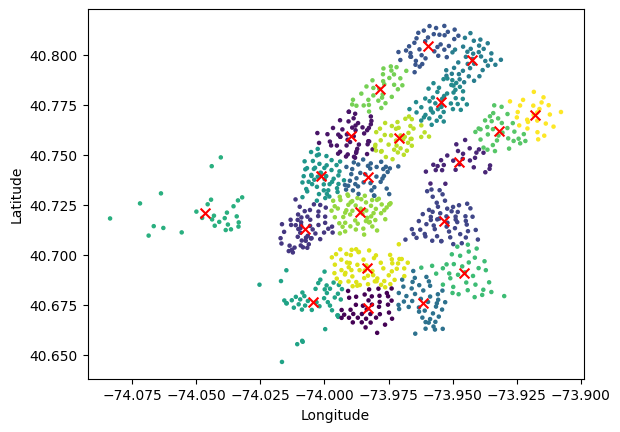

In [22]:
# plot with cluster colour & centriods
plt.scatter(coords_end[:,0], coords_end[:,1], c=kmeans.labels_, s=5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker="x", s=50)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [23]:
# run this cell for coords of starting stations and the fully edited dataframe
coords_start = coords_start_copy.copy()
coords_end = coords_end_copy.copy()
df = df_copy2.copy()
print(df.shape) # to check if no data loss, should be (17548339, 15)
df.head()


(17545760, 15)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber,drop_label,pick_label
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1,15,1


## Part 2

We need to predict the following

In [24]:
df = df_copy2.copy()
# find n largest pick cluster, randomly chose pick label over drop label 
# made to be 20 for part 3 as we need all clusters to have models
n = 4
largest_cluster = df['drop_label'].value_counts().nlargest(n).index[:n]
print(largest_cluster)
# get all rows with largest cluster 
df = df[df['pick_label'].isin(largest_cluster)]


Index([10, 1, 16, 6], dtype='int32', name='drop_label')


In [25]:
# # 1st plot amount of predictions per hour per cluster 
# grouby_label = df.groupby(['pick_label', df['starttime'].dt.hour]).size().reset_index(name='count')
# grouby_label = grouby_label.pivot(index='starttime', columns='pick_label', values='count')
# grouby_label.plot(figsize=(20,10), legend=True)
# plt.ylabel('Count')
# plt.xlabel('Hour')
# plt.show()

In [26]:
def starndarise_df(df):
    return (df - df.mean()) / df.std()

def strandardise_array(array):
    return (array - arry.mean()) / arry.std()

Start by splitting up the dataset. Necessary because how are you going to aggregate the data by hour if each datapoint has 2 temporal parameters (start and end station times). Note that we can only use the hour and cluster as input to our model, as these are the only variables we have certain information on for the future datapoints for which we predict the demand, so we only have to copy these variables over in the new datasets. 

In [27]:
df_departures = df[['starttime', 'pick_label']].copy()
df_arrivals = df[['stoptime', 'drop_label']].copy()

# rename label columns
df_departures.rename(columns={'pick_label':'label'}, inplace=True)
df_arrivals.rename(columns={'drop_label':'label'}, inplace=True)

# Extract date and time components
def extract_date_time_components(df, time_column):
    df['hour'] = df[time_column].dt.hour
    df['day'] = df[time_column].dt.day
    df['month'] = df[time_column].dt.month
    ##### df['days_from_beg_of_year'] = df[time_column].dt.dayofyear
    df.drop(columns=[time_column], inplace=True)

extract_date_time_components(df_departures, 'starttime')
extract_date_time_components(df_arrivals, 'stoptime')

# Remove trip_id index
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

# function to split data into train and test set train if month < 11, test if month >= 11
def split_train_test(df):
    df_train = df[df['month'] < 11]
    df_test = df[df['month'] >= 11]
    return df_train, df_test


# Count the number of rows with the same label, hour, and save it in a new column
def count(df):
    counts = df.groupby(['label', 'hour', 'day', 'month']).size().reset_index(name='count')
    df = df.merge(counts, on=['label', 'hour', 'day', 'month'], how='left')
    # counts = df.groupby(['label', 'hour']).size().reset_index(name='count')
    # df = df.merge(counts, on=['label', 'hour'], how='left')
    return df


# Split data into train and test set
df_departures_train, df_departures_test = split_train_test(df_departures)
df_arrivals_train, df_arrivals_test = split_train_test(df_arrivals)

# Count the number of rows with the same label, hour, and save it in a new column
df_departures_train = count(df_departures_train)
df_departures_test = count(df_departures_test)
df_arrivals_train = count(df_arrivals_train)
df_arrivals_test = count(df_arrivals_test)


In [28]:
# keep unique rows
df_departures_train.drop_duplicates(inplace=True)
df_departures_test.drop_duplicates(inplace=True)
df_arrivals_train.drop_duplicates(inplace=True)
df_arrivals_test.drop_duplicates(inplace=True)

# reset index
df_departures_train.reset_index(inplace=True)
df_departures_test.reset_index(inplace=True)
df_arrivals_train.reset_index(inplace=True)
df_arrivals_test.reset_index(inplace=True)

In [29]:
df_departures_train.head()

,index,label,hour,day,month,count
0,0,1,13,1,1,40
1,1,1,15,1,1,52
2,4,1,18,1,1,44
3,5,1,21,1,1,27
4,6,1,7,2,1,253


In [30]:
df_departures_test.head()

,index,label,hour,day,month,count
0,0,10,0,1,11,88
1,1,6,0,1,11,72
2,2,1,0,1,11,53
3,11,16,0,1,11,88
4,300,6,1,1,11,33


In [31]:
df_arrivals_train.head()

,index,label,hour,day,month,count
0,0,1,14,1,1,21
1,1,1,15,1,1,35
2,4,15,18,1,1,3
3,5,10,21,1,1,26
4,6,17,8,2,1,189


In [32]:
df_arrivals_test.head()

,index,label,hour,day,month,count
0,0,11,9,5,11,2
1,1,16,21,1,11,317
2,2,4,6,1,11,2
3,3,16,15,2,11,344
4,5,16,2,2,11,21


note: days close to eachother being linked in prediction is already included in the model as you have days and months in your model. And i dont think that it matters that i split up days and months (my guess what taht the model believes the first day of each month is closely related which it isnt. But the month is also included, nevertheless it is a fair thought. Maybe it is better to include the day and month as a counter instead, this will avoid the first day of each month being related! (as yes the months differentiate them, but the first of jun is still close in dist to the first of jan in my method, while with a continuous counter this would really not be the case. Change later

In [33]:
# function to split x and y data
def create_x_y(df):
    x = df.drop(columns=['count'])
    y = df['count']
    return x, y

In [34]:
# split data per label for n
for i in range(n):
    globals()['df_departures_train_{}'.format(i)] = df_departures_train[df_departures_train['label'] == largest_cluster[i]]
    globals()['df_departures_test_{}'.format(i)] = df_departures_test[df_departures_test['label'] == largest_cluster[i]]
    globals()['df_arrivals_train_{}'.format(i)] = df_arrivals_train[df_arrivals_train['label'] == largest_cluster[i]]
    globals()['df_arrivals_test_{}'.format(i)] = df_arrivals_test[df_arrivals_test['label'] == largest_cluster[i]]

    # split x and y 
    globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)] = create_x_y(globals()['df_departures_train_{}'.format(i)])
    globals()['x_departures_test_{}'.format(i)], globals()['y_departures_test_{}'.format(i)] = create_x_y(globals()['df_departures_test_{}'.format(i)])
    globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)] = create_x_y(globals()['df_arrivals_train_{}'.format(i)])
    globals()['x_arrivals_test_{}'.format(i)], globals()['y_arrivals_test_{}'.format(i)] = create_x_y(globals()['df_arrivals_test_{}'.format(i)])

    # drop label from x
    globals()['x_departures_train_{}'.format(i)].drop(columns=['label'], inplace=True)
    globals()['x_departures_test_{}'.format(i)].drop(columns=['label'], inplace=True)
    globals()['x_arrivals_train_{}'.format(i)].drop(columns=['label'], inplace=True)
    globals()['x_arrivals_test_{}'.format(i)].drop(columns=['label'], inplace=True)
    

In [35]:
# show x data for label 19
x_departures_train_0.head()

,index,hour,day,month
420,1324,1,1,1
421,1326,9,1,1
422,1327,10,1,1
423,1329,11,1,1
424,1331,12,1,1


In [36]:
y_departures_train_0.head()

420    27
421    17
422    30
423    52
424    42
Name: count, dtype: int64

In [37]:
# stardarise data and y
for i in range(n):
    globals()['x_departures_train_{}'.format(i)] = starndarise_df(globals()['x_departures_train_{}'.format(i)])
    globals()['x_departures_test_{}'.format(i)] = starndarise_df(globals()['x_departures_test_{}'.format(i)])
    globals()['x_arrivals_train_{}'.format(i)] = starndarise_df(globals()['x_arrivals_train_{}'.format(i)])
    globals()['x_arrivals_test_{}'.format(i)] = starndarise_df(globals()['x_arrivals_test_{}'.format(i)])
    globals()['y_departures_train_{}'.format(i)] = starndarise_df(globals()['y_departures_train_{}'.format(i)])
    globals()['y_departures_test_{}'.format(i)] = starndarise_df(globals()['y_departures_test_{}'.format(i)])
    globals()['y_arrivals_train_{}'.format(i)] = starndarise_df(globals()['y_arrivals_train_{}'.format(i)])
    globals()['y_arrivals_test_{}'.format(i)] = starndarise_df(globals()['y_arrivals_test_{}'.format(i)])
    

These are empty because there are no departure data for these therefore no model will be created.

In [38]:
# import XGB regressor
from sklearn.ensemble import RandomForestRegressor as XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# r^2 score
from sklearn.metrics import r2_score

In [39]:
for i in range(n):
    
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    
    globals()['reg_departures_{}'.format(i)] = Ridge().fit(globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}'.format(i)] = Ridge().fit(globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # save the results to variables
    globals()['y_departures_pred_{}'.format(i)] = globals()['reg_departures_{}'.format(i)].predict(globals()['x_departures_test_{}'.format(i)])
    globals()['y_arrivals_pred_{}'.format(i)] = globals()['reg_arrivals_{}'.format(i)].predict(globals()['x_arrivals_test_{}'.format(i)])

    # print r^2 score using the y_departures_pred and y_arrivals_pred
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['y_departures_pred_{}'.format(i)])))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['y_arrivals_pred_{}'.format(i)])))
    



r^2 score for departures label 10: -0.08404979702929727
r^2 score for arrivals label 10: -0.07083298965048246
r^2 score for departures label 1: -0.12898689721224388
r^2 score for arrivals label 1: -0.054709088640967796
r^2 score for departures label 16: -0.11425123834028006
r^2 score for arrivals label 16: 0.07515583346954868
r^2 score for departures label 6: -0.06277581997399784
r^2 score for arrivals label 6: -0.06498158826632983


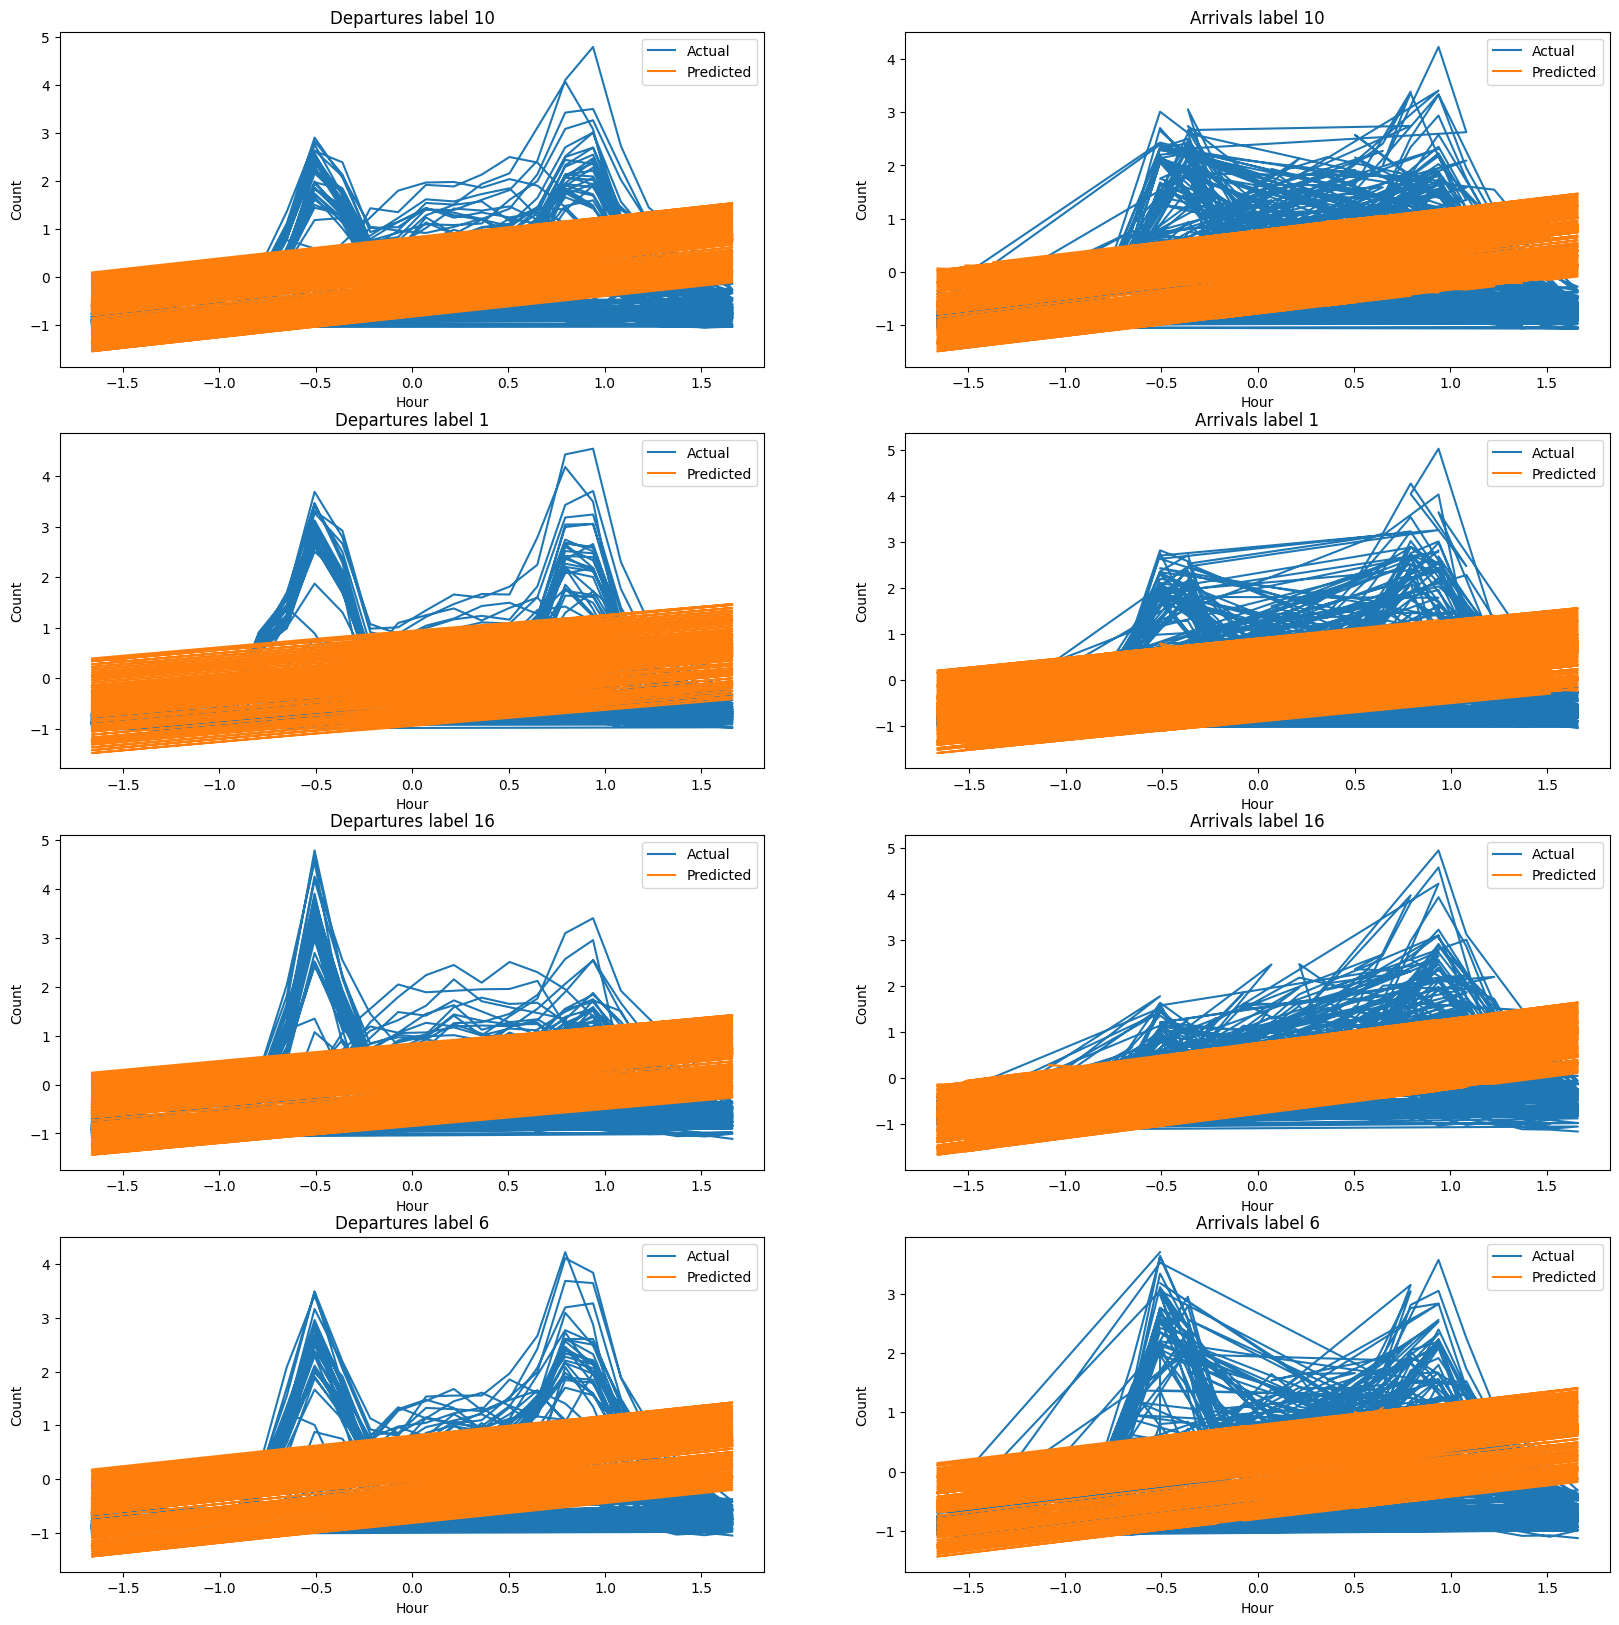

In [40]:
# grid plot hourly prediction of each model for departures and arrivals

fig, axs = plt.subplots(n, 2, figsize=(20, 20))
for i in range(n):
    axs[i, 0].plot(globals()['x_departures_test_{}'.format(i)]['hour'], globals()['y_departures_test_{}'.format(i)], label='Actual')
    axs[i, 0].plot(globals()['x_departures_test_{}'.format(i)]['hour'], globals()['y_departures_pred_{}'.format(i)], label='Predicted')
    axs[i, 0].set_ylabel('Count')
    axs[i, 0].set_xlabel('Hour')
    axs[i, 0].set_title('Departures label {}'.format(largest_cluster[i]))
    axs[i, 0].legend()

    axs[i, 1].plot(globals()['x_arrivals_test_{}'.format(i)]['hour'], globals()['y_arrivals_test_{}'.format(i)], label='Actual')
    axs[i, 1].plot(globals()['x_arrivals_test_{}'.format(i)]['hour'], globals()['y_arrivals_pred_{}'.format(i)], label='Predicted')
    axs[i, 1].set_ylabel('Count')
    axs[i, 1].set_xlabel('Hour')
    axs[i, 1].set_title('Arrivals label {}'.format(largest_cluster[i]))
    axs[i, 1].legend()

plt.show()

Add polynomials to increase r^2

In [41]:
# specify the degree of polynomial that aproximates the pickup data
degree = 10

In [59]:

def add_polynomial(x_data, n):
    x_data_poly = x_data.copy()
    for i in range(2, n+1):
        x_data_poly = np.concatenate((x_data_poly, np.power(x_data, i)), axis=1)
    return x_data_poly

In [60]:
print(add_polynomial(x_departures_train_0, degree).shape)

(7266, 40)


In [61]:
# add polynomial features
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    globals()['x_departures_train_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_train_{}'.format(i)], degree)
    globals()['x_departures_test_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_test_{}'.format(i)], degree)
    globals()['x_arrivals_train_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_train_{}'.format(i)], degree)
    globals()['x_arrivals_test_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}'.format(i)], degree)

In [62]:
x_departures_test_0_poly[0]

array([  -1.89957826,   -1.66075728,   -1.6747055 ,   -1.01618281,
          3.60839757,    2.75811475,    2.80463851,    1.0326275 ,
         -6.85443357,   -4.58055917,   -4.69694354,   -1.04933832,
         13.020533  ,    7.607197  ,    7.86599719,    1.06631956,
        -24.73352141,  -12.63370782,  -13.17322876,   -1.08357561,
         46.98325958,   20.98152227,   22.06127866,    1.10111091,
        -89.24837848,  -34.84521593,  -36.94614473,   -1.11892998,
        169.53427951,   57.86944615,   61.87391179,    1.13703741,
       -322.04363169,  -96.10710417, -103.62058042,   -1.15543787,
        611.74708157,  159.61057323,  173.53395598,    1.1741361 ])

In [63]:
# train lin reg model per label with polynomial features

for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    globals()['reg_departures_{}_poly'.format(i)] = Ridge().fit(globals()['x_departures_train_{}_poly'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}_poly'.format(i)] = Ridge().fit(globals()['x_arrivals_train_{}_poly'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]))))



r^2 score for departures label 10: -7.740906073559133
r^2 score for arrivals label 10: -5.9199883070266335
r^2 score for departures label 1: -2.3794283866314787
r^2 score for arrivals label 1: -0.6552082448319292
r^2 score for departures label 16: -6.991994950157326
r^2 score for arrivals label 16: -65.7376735579578
r^2 score for departures label 6: -1.8414462552041613
r^2 score for arrivals label 6: -1.2807543411628695


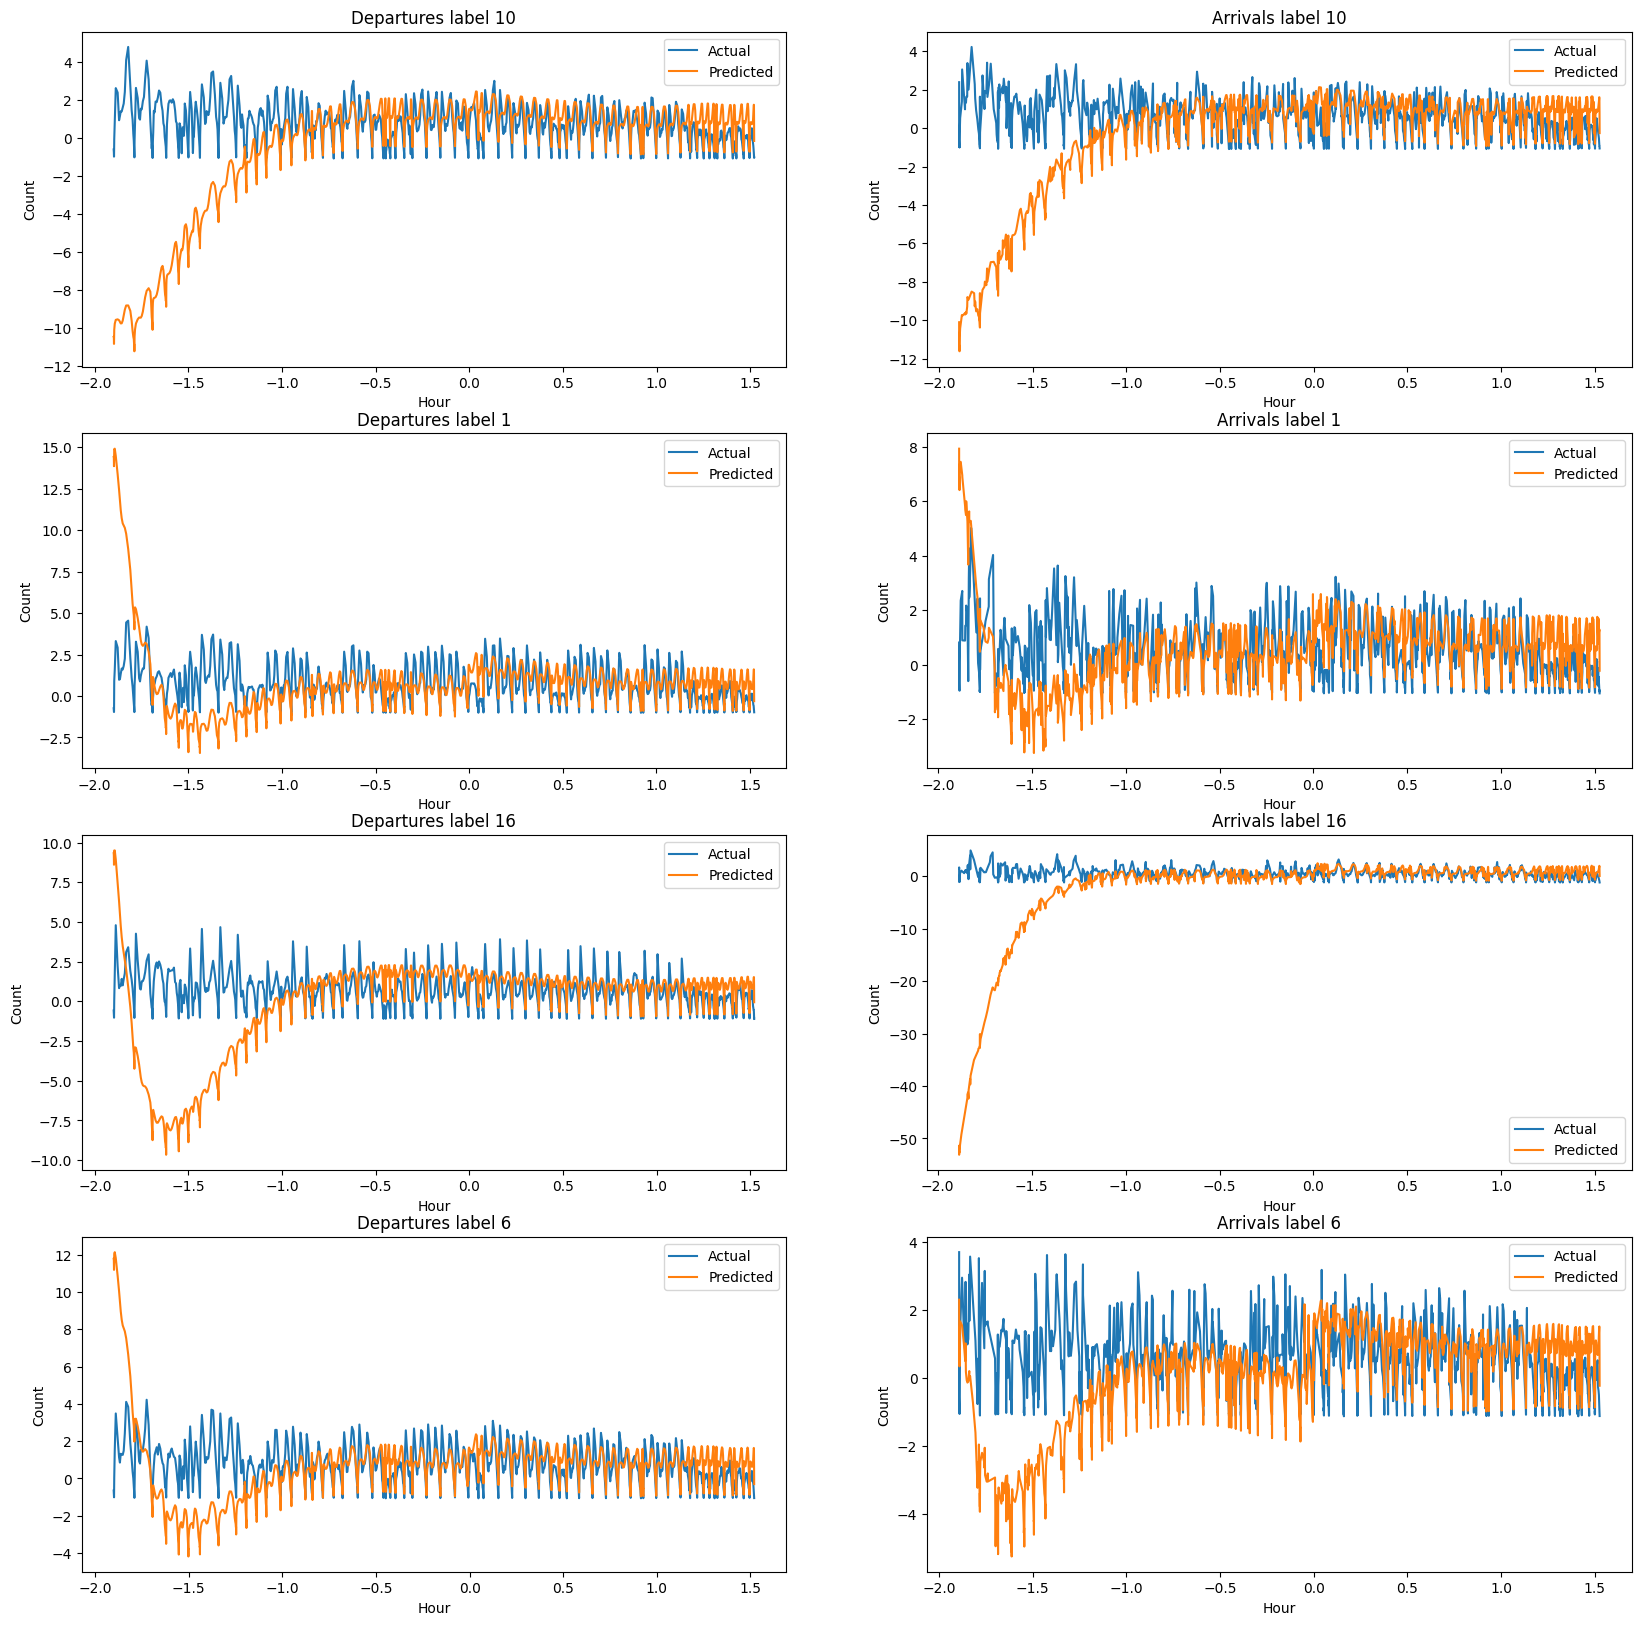

In [64]:
fig, axs = plt.subplots(n, 2, figsize=(20, 20))
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    # add polynomial features
    globals()['x_departures_test_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_test_{}'.format(i)], degree)
    globals()['x_arrivals_test_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}'.format(i)], degree)

    axs[i, 0].plot(globals()['x_departures_test_{}_poly'.format(i)][:, 0], globals()['y_departures_test_{}'.format(i)], label='Actual')
    axs[i, 0].plot(globals()['x_departures_test_{}_poly'.format(i)][:, 0], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]), label='Predicted')
    axs[i, 0].set_ylabel('Count')
    axs[i, 0].set_xlabel('Hour')
    axs[i, 0].set_title('Departures label {}'.format(largest_cluster[i]))
    axs[i, 0].legend()

    axs[i, 1].plot(globals()['x_arrivals_test_{}_poly'.format(i)][:, 0], globals()['y_arrivals_test_{}'.format(i)], label='Actual')
    axs[i, 1].plot(globals()['x_arrivals_test_{}_poly'.format(i)][:, 0], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]), label='Predicted')
    axs[i, 1].set_ylabel('Count')
    axs[i, 1].set_xlabel('Hour')
    axs[i, 1].set_title('Arrivals label {}'.format(largest_cluster[i]))
    axs[i, 1].legend()

plt.show()

In [65]:
# show paramaters of the model
print('Departures label 0: {}'.format(globals()['reg_departures_{}_poly'.format(0)].coef_))

Departures label 0: [-7.72412082e-01 -3.56305161e-01  6.40824509e-02  6.12879014e-01
 -9.38919771e-01  1.11576943e+00  2.23205717e-01  2.01894810e-01
  5.34120673e-01  4.59064214e+00  2.14368242e-01  6.16211945e-02
  1.13090614e-02 -1.42952349e+00 -3.26644405e-01  8.70310378e-01
  2.24758170e-01 -4.53798198e+00 -3.79998227e-01 -6.84826638e-02
  1.52631436e-01 -1.91326559e-01  1.29219857e-01  8.78448262e-02
  1.01608838e-01  1.55969808e+00  2.02917276e-01 -3.90043927e-01
 -2.34971649e-01  4.36709247e-01 -1.01928672e-02 -5.86687050e-01
 -3.87620721e-02 -1.80290282e-01 -3.37294458e-02  1.45708043e-01
  4.92277633e-02 -9.06809255e-02 -1.28207159e-03  1.80709230e-01]


Add lag to increase r^2 

In [66]:
# lag features for each column
def add_lag_features(df, n):
    df_lag = df.copy()
    for i in range(1, n+1):
        df_lag['hour_lag_{}'.format(i)] = df_lag['hour'].shift(i)
        df_lag['day_lag_{}'.format(i)] = df_lag['day'].shift(i)
        df_lag['month_lag_{}'.format(i)] = df_lag['month'].shift(i)
        df_lag['count_lag_{}'.format(i)] = df_lag['count'].shift(i)
    df_lag.dropna(inplace=True)
    return df_lag

In [67]:
lag = 10

In [68]:
# add lag features
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    globals()['df_departures_train_{}_lag'.format(i)] = add_lag_features(globals()['df_departures_train_{}'.format(i)], lag)
    globals()['df_departures_test_{}_lag'.format(i)] = add_lag_features(globals()['df_departures_test_{}'.format(i)], lag)
    globals()['df_arrivals_train_{}_lag'.format(i)] = add_lag_features(globals()['df_arrivals_train_{}'.format(i)], lag)
    globals()['df_arrivals_test_{}_lag'.format(i)] = add_lag_features(globals()['df_arrivals_test_{}'.format(i)], lag)

In [69]:
df_departures_train_0_lag.head()

,index,label,hour,day,month,count,hour_lag_1,day_lag_1,month_lag_1,count_lag_1,...,month_lag_8,count_lag_8,hour_lag_9,day_lag_9,month_lag_9,count_lag_9,hour_lag_10,day_lag_10,month_lag_10,count_lag_10
430,1342,10,6,2,1,56,0.0,2.0,1.0,5.0,...,1.0,30.0,9.0,1.0,1.0,17.0,1.0,1.0,1.0,27.0
431,1344,10,7,2,1,101,6.0,2.0,1.0,56.0,...,1.0,52.0,10.0,1.0,1.0,30.0,9.0,1.0,1.0,17.0
432,1346,10,8,2,1,198,7.0,2.0,1.0,101.0,...,1.0,42.0,11.0,1.0,1.0,52.0,10.0,1.0,1.0,30.0
433,1349,10,9,2,1,172,8.0,2.0,1.0,198.0,...,1.0,33.0,12.0,1.0,1.0,42.0,11.0,1.0,1.0,52.0
434,1356,10,10,2,1,87,9.0,2.0,1.0,172.0,...,1.0,55.0,13.0,1.0,1.0,33.0,12.0,1.0,1.0,42.0


In [70]:
df_arrivals_test_0_lag.head()

,index,label,hour,day,month,count,hour_lag_1,day_lag_1,month_lag_1,count_lag_1,...,month_lag_8,count_lag_8,hour_lag_9,day_lag_9,month_lag_9,count_lag_9,hour_lag_10,day_lag_10,month_lag_10,count_lag_10
127,5177,10,9,1,11,638,10.0,1.0,11.0,380.0,...,11.0,28.0,0.0,1.0,11.0,75.0,8.0,1.0,11.0,536.0
158,10113,10,11,1,11,319,9.0,1.0,11.0,638.0,...,11.0,16.0,1.0,1.0,11.0,28.0,0.0,1.0,11.0,75.0
161,10297,10,12,1,11,401,11.0,1.0,11.0,319.0,...,11.0,19.0,2.0,1.0,11.0,16.0,1.0,1.0,11.0,28.0
183,11757,10,14,1,11,372,12.0,1.0,11.0,401.0,...,11.0,14.0,3.0,1.0,11.0,19.0,2.0,1.0,11.0,16.0
194,12443,10,13,1,11,419,14.0,1.0,11.0,372.0,...,11.0,42.0,4.0,1.0,11.0,14.0,3.0,1.0,11.0,19.0


In [71]:
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    
    globals()['x_departures_train_{}_lag'.format(i)], globals()['y_departures_train_{}_lag'.format(i)] = create_x_y(globals()['df_departures_train_{}_lag'.format(i)])
    globals()['x_departures_test_{}_lag'.format(i)], globals()['y_departures_test_{}_lag'.format(i)] = create_x_y(globals()['df_departures_test_{}_lag'.format(i)])
    globals()['x_arrivals_train_{}_lag'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)] = create_x_y(globals()['df_arrivals_train_{}_lag'.format(i)])
    globals()['x_arrivals_test_{}_lag'.format(i)], globals()['y_arrivals_test_{}_lag'.format(i)] = create_x_y(globals()['df_arrivals_test_{}_lag'.format(i)])

    # drop label from x
    globals()['x_departures_train_{}_lag'.format(i)].drop(columns=['label'], inplace=True)
    globals()['x_departures_test_{}_lag'.format(i)].drop(columns=['label'], inplace=True)
    globals()['x_arrivals_train_{}_lag'.format(i)].drop(columns=['label'], inplace=True)
    globals()['x_arrivals_test_{}_lag'.format(i)].drop(columns=['label'], inplace=True)

    # stardarise data
    globals()['x_departures_train_{}_lag'.format(i)] = starndarise_df(globals()['x_departures_train_{}_lag'.format(i)])
    globals()['x_departures_test_{}_lag'.format(i)] = starndarise_df(globals()['x_departures_test_{}_lag'.format(i)])
    globals()['x_arrivals_train_{}_lag'.format(i)] = starndarise_df(globals()['x_arrivals_train_{}_lag'.format(i)])
    globals()['x_arrivals_test_{}_lag'.format(i)] = starndarise_df(globals()['x_arrivals_test_{}_lag'.format(i)])

In [72]:
# print shape of x data
print(x_departures_train_0_lag.shape)

(7256, 44)


In [73]:
# ridge
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    

    # train model
    globals()['reg_departures_{}_lag'.format(i)] = Ridge().fit(globals()['x_departures_train_{}_lag'.format(i)], globals()['y_departures_train_{}_lag'.format(i)])
    globals()['reg_arrivals_{}_lag'.format(i)] = Ridge().fit(globals()['x_arrivals_train_{}_lag'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)])
    

r^2 score for departures label 10: 0.6204546318983364
r^2 score for arrivals label 10: 0.329923013558414
r^2 score for departures label 1: 0.6430945355127471
r^2 score for arrivals label 1: 0.271869599601541
r^2 score for departures label 16: 0.6044619397504944
r^2 score for arrivals label 16: 0.3335664742196319
r^2 score for departures label 6: 0.7291135895457114
r^2 score for arrivals label 6: 0.38885762192167406


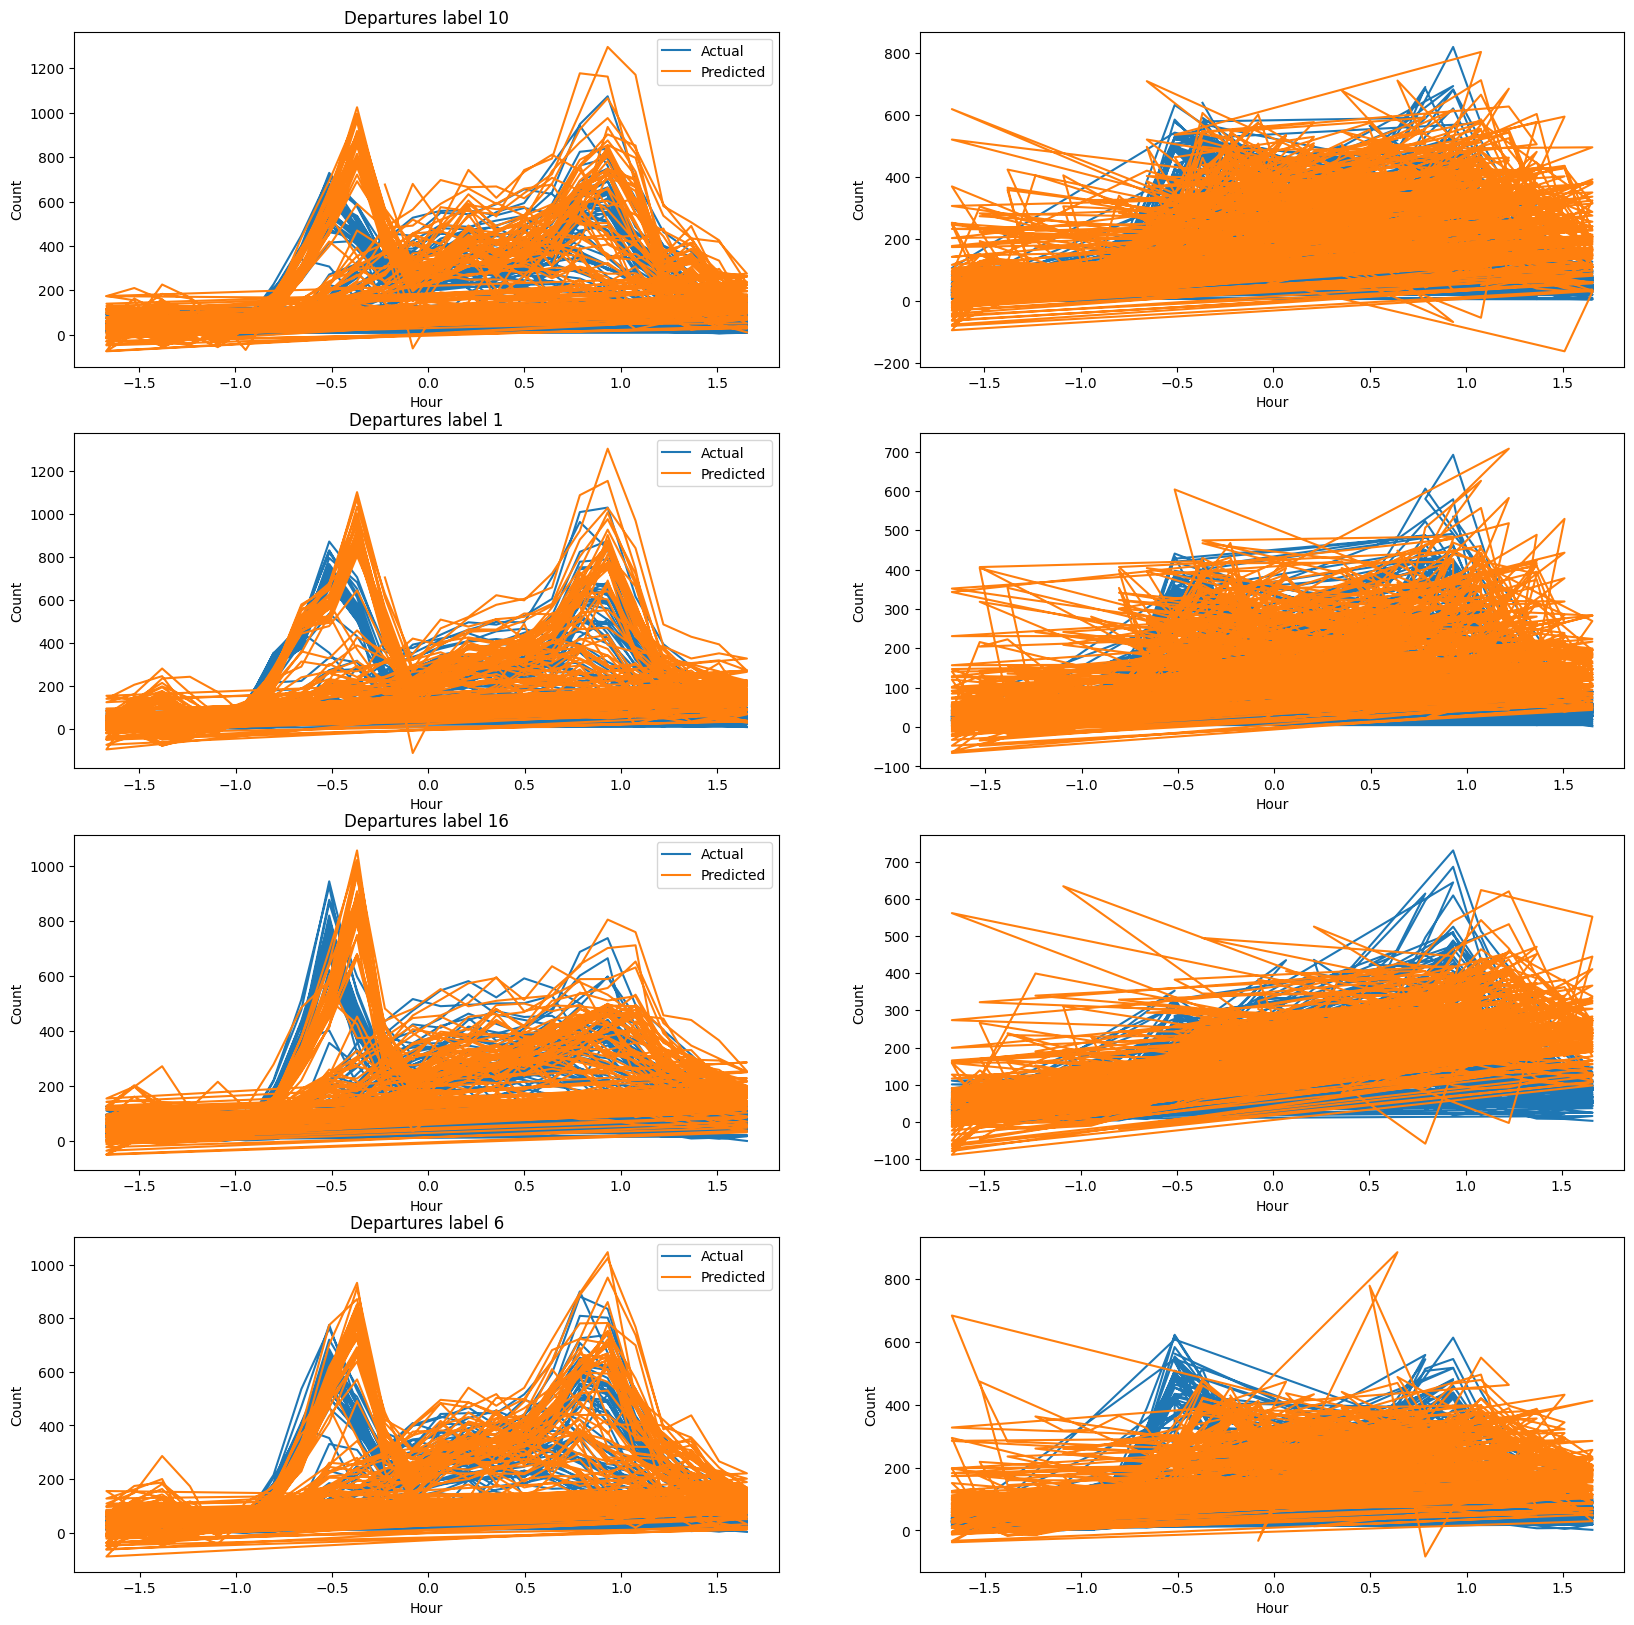

In [96]:
# r^2 and plot
fig, axs = plt.subplots(n, 2, figsize=(20, 20))
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    # save the results to variables
    globals()['y_departures_pred_{}_lag'.format(i)] = globals()['reg_departures_{}_lag'.format(i)].predict(globals()['x_departures_test_{}_lag'.format(i)])
    globals()['y_arrivals_pred_{}_lag'.format(i)] = globals()['reg_arrivals_{}_lag'.format(i)].predict(globals()['x_arrivals_test_{}_lag'.format(i)])

    # print r^2 score using the y_departures_pred and y_arrivals_pred
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}_lag'.format(i)], globals()['y_departures_pred_{}_lag'.format(i)])))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}_lag'.format(i)], globals()['y_arrivals_pred_{}_lag'.format(i)])))

    axs[i, 0].plot(globals()['x_departures_test_{}_lag'.format(i)]['hour'], globals()['y_departures_test_{}_lag'.format(i)], label='Actual')
    axs[i, 0].plot(globals()['x_departures_test_{}_lag'.format(i)]['hour'], globals()['y_departures_pred_{}_lag'.format(i)], label='Predicted')
    axs[i, 0].set_ylabel('Count')
    axs[i, 0].set_xlabel('Hour')
    axs[i, 0].set_title('Departures label {}'.format(largest_cluster[i]))
    axs[i, 0].legend()

    axs[i, 1].plot(globals()['x_arrivals_test_{}_lag'.format(i)]['hour'], globals()['y_arrivals_test_{}_lag'.format(i)], label='Actual')
    axs[i, 1].plot(globals()['x_arrivals_test_{}_lag'.format(i)]['hour'], globals()['y_arrivals_pred_{}_lag'.format(i)], label='Predicted')
    axs[i, 1].set_ylabel('Count')
    axs[i, 1].set_xlabel('Hour')
    

In [82]:
degree = 5

In [88]:
# add poly to lag features
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    # add polynomial features to all columns except count and save as x data
    globals()['x_departures_train_{}_lag_poly'.format(i)] = add_polynomial(globals()['df_departures_train_{}_lag'.format(i)].drop(columns=['count', 'label']), degree)
    globals()['x_departures_test_{}_lag_poly'.format(i)] = add_polynomial(globals()['df_departures_test_{}_lag'.format(i)].drop(columns=['count', 'label']), degree)
    globals()['x_arrivals_train_{}_lag_poly'.format(i)] = add_polynomial(globals()['df_arrivals_train_{}_lag'.format(i)].drop(columns=['count', 'label']), degree)
    globals()['x_arrivals_test_{}_lag_poly'.format(i)] = add_polynomial(globals()['df_arrivals_test_{}_lag'.format(i)].drop(columns=['count', 'label']), degree)


    globals()['y_departures_train_{}_lag'.format(i)] = globals()['df_departures_train_{}_lag'.format(i)]['count']
    globals()['y_departures_test_{}_lag'.format(i)] = globals()['df_departures_test_{}_lag'.format(i)]['count']
    globals()['y_arrivals_train_{}_lag'.format(i)] = globals()['df_arrivals_train_{}_lag'.format(i)]['count']
    globals()['y_arrivals_test_{}_lag'.format(i)] = globals()['df_arrivals_test_{}_lag'.format(i)]['count']


In [89]:
x_departures_train_0_lag_poly.shape

(7256, 220)

In [90]:
x_arrivals_test_0_lag_poly.shape

(1454, 220)

In [91]:
# standardise lag data
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    globals()['x_departures_train_{}_lag_poly'.format(i)] = starndarise_df(globals()['x_departures_train_{}_lag_poly'.format(i)])
    globals()['x_departures_test_{}_lag_poly'.format(i)] = starndarise_df(globals()['x_departures_test_{}_lag_poly'.format(i)])
    globals()['x_arrivals_train_{}_lag_poly'.format(i)] = starndarise_df(globals()['x_arrivals_train_{}_lag_poly'.format(i)])
    globals()['x_arrivals_test_{}_lag_poly'.format(i)] = starndarise_df(globals()['x_arrivals_test_{}_lag_poly'.format(i)])

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [94]:
# train model
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_departures_test_{}'.format(i)].empty:
        print('EMPTY')
        continue
    globals()['reg_departures_{}_lag_poly'.format(i)] = Ridge().fit(globals()['x_departures_train_{}_lag_poly'.format(i)], globals()['y_departures_train_{}_lag'.format(i)])
    globals()['reg_arrivals_{}_lag_poly'.format(i)] = Ridge().fit(globals()['x_arrivals_train_{}_lag_poly'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}_lag'.format(i)], globals()['reg_departures_{}_lag_poly'.format(i)].predict(globals()['x_departures_test_{}_lag_poly'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}_lag'.format(i)], globals()['reg_arrivals_{}_lag_poly'.format(i)].predict(globals()['x_arrivals_test_{}_lag_poly'.format(i)]))))

r^2 score for departures label 10: -0.14837783622067513
r^2 score for arrivals label 10: -0.10321348511635553
r^2 score for departures label 1: -0.11572299654175677
r^2 score for arrivals label 1: -0.10686303712763778
r^2 score for departures label 16: -0.10921964346087898
r^2 score for arrivals label 16: -0.10093197051729041
r^2 score for departures label 6: -0.08858797696677412
r^2 score for arrivals label 6: -0.06692029015320244


ValueError: X has 20 features, but Ridge is expecting 220 features as input.

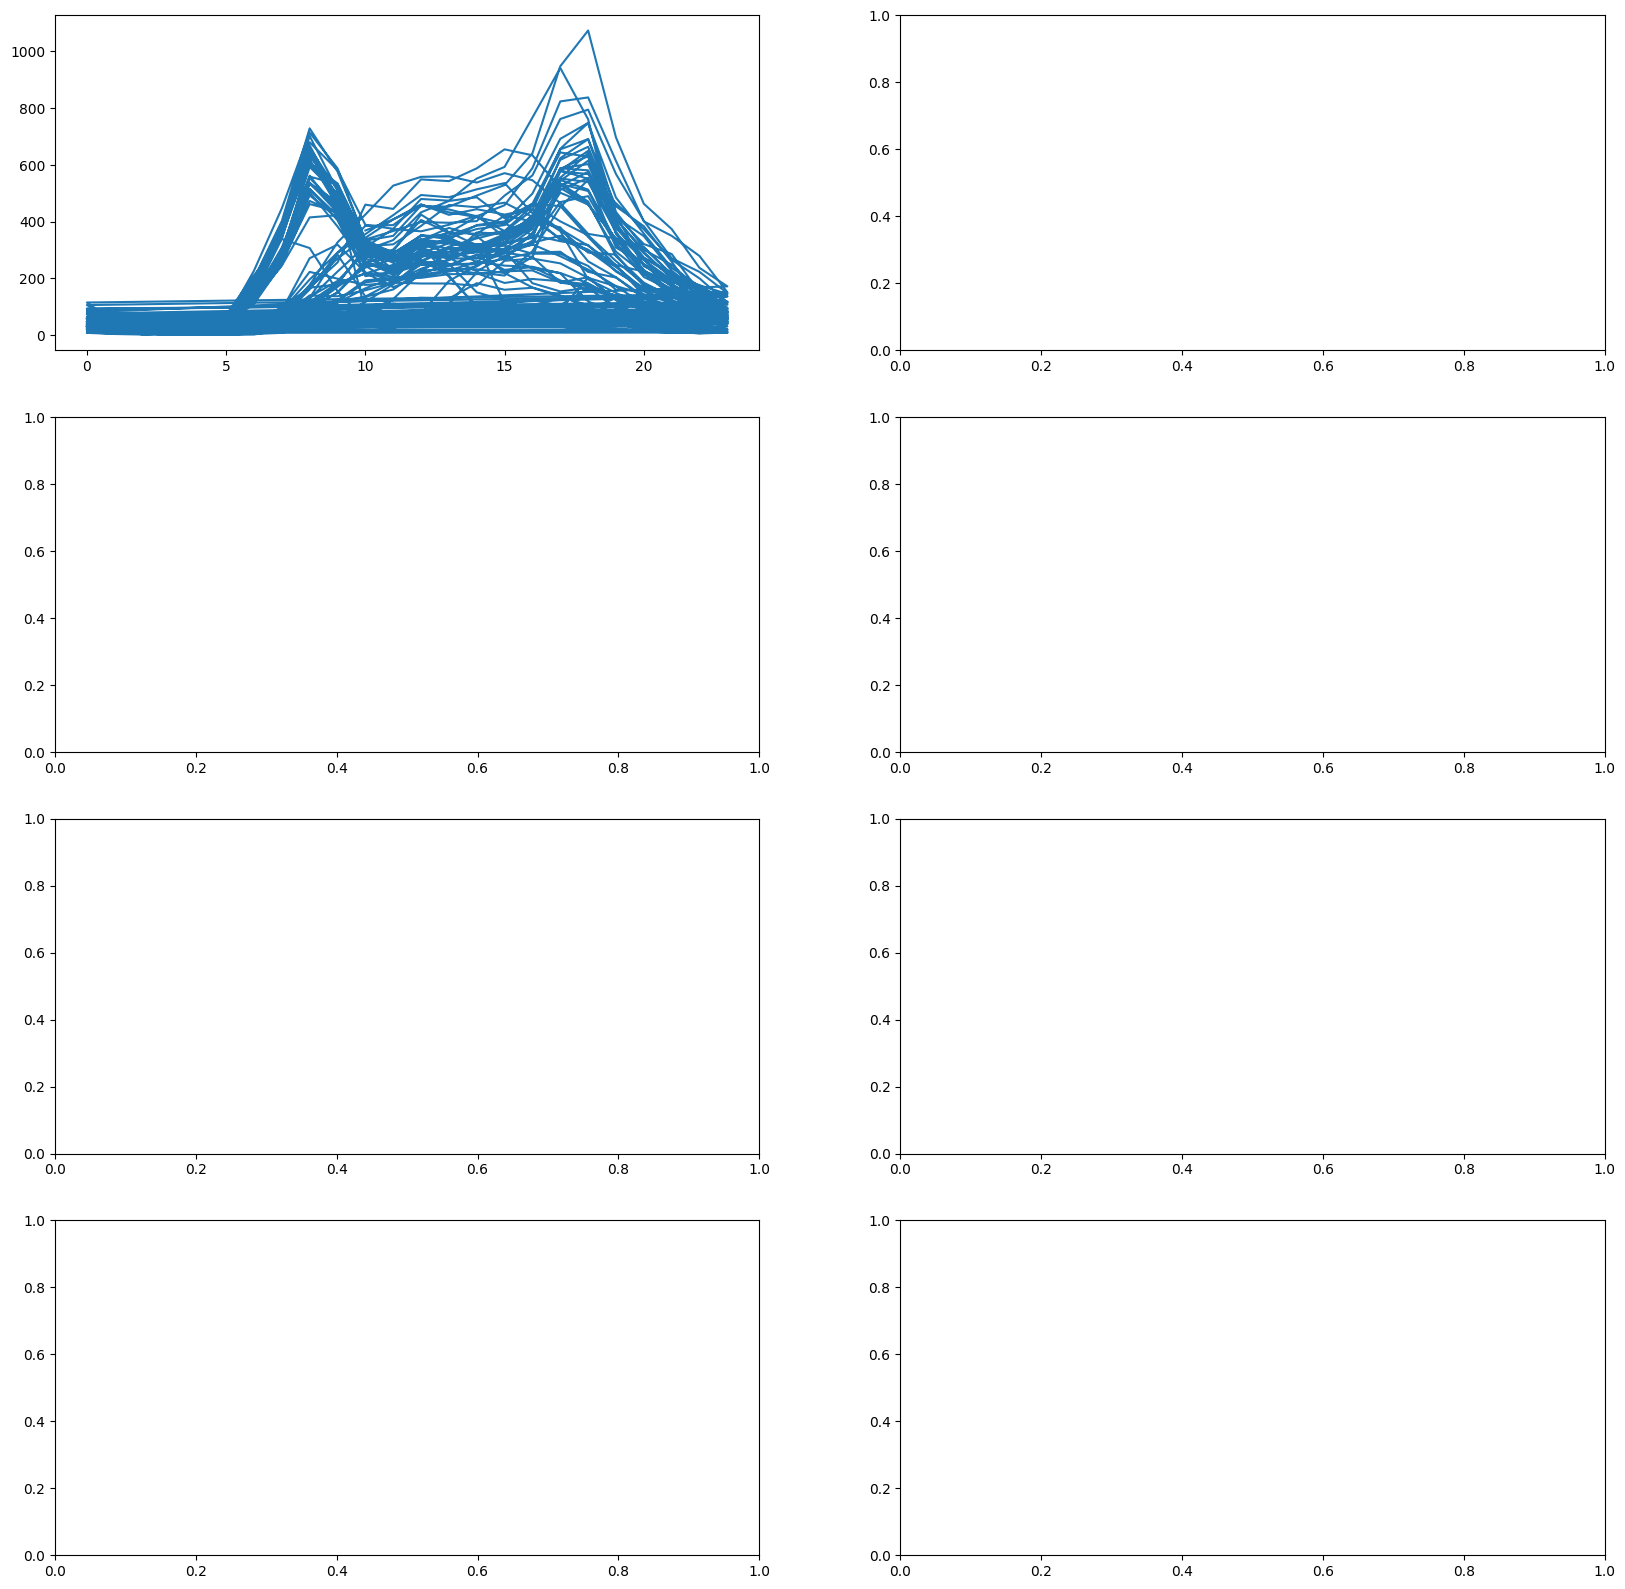

In [95]:
fig, axs = plt.subplots(n, 2, figsize=(20, 20))
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    # add polynomial features
    globals()['x_departures_test_{}_lag_poly'.format(i)] = add_polynomial(globals()['df_departures_test_{}_lag'.format(i)][['hour', 'day', 'month', 'label']].values, degree)
    globals()['x_arrivals_test_{}_lag_poly'.format(i)] = add_polynomial(globals()['df_arrivals_test_{}_lag'.format(i)][['hour', 'day', 'month', 'label']].values, degree)

    axs[i, 0].plot(globals()['df_departures_test_{}_lag'.format(i)]['hour'], globals()['df_departures_test_{}_lag'.format(i)]['count'], label='Actual')
    axs[i, 0].plot(globals()['df_departures_test_{}_lag'.format(i)]['hour'], globals()['reg_departures_{}_lag_poly'.format(i)].predict(globals()['x_departures_test_{}_lag_poly'.format(i)]), label='Predicted')
    axs[i, 0].set_ylabel('Count')
    axs[i, 0].set_xlabel('Hour')
    axs[i, 0].set_title('Departures label {}'.format(largest_cluster[i]))
    axs[i, 0].legend()

    axs[i, 1].plot(globals()['df_arrivals_test_{}_lag'.format(i)]['hour'], globals()['df_arrivals_test_{}_lag'.format(i)]['count'], label='Actual')
    axs[i, 1].plot(globals()['df_arrivals_test_{}_lag'.format(i)]['hour'], globals()['reg_arrivals_{}_lag_poly'.format(i)].predict(globals()['x_arrivals_test_{}_lag_poly'.format(i)]), label='Predicted')
    axs[i, 1].set_ylabel('Count')
    axs[i, 1].set_xlabel('Hour')
    axs[i, 1].set_title('Arrivals label {}'.format(largest_cluster[i]))
    axs[i, 1].legend()

plt.show()



Lag doesn't really help so shouldn't include

In [ ]:
# make random forest model
# from sklearn.ensemble import RandomForestRegressor

# train random forest model per label with lag features
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    globals()['reg_departures_{}_lag_rf'.format(i)] = RandomForestRegressor().fit(globals()['x_departures_train_{}_lag'.format(i)], globals()['y_departures_train_{}_lag'.format(i)])
    globals()['reg_arrivals_{}_lag_rf'.format(i)] = RandomForestRegressor().fit(globals()['x_arrivals_train_{}_lag'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)])

#     # print r^2 score
#     print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}_lag'.format(i)], globals()['reg_departures_{}_lag_rf'.format(i)].predict(globals()['x_departures_test_{}_lag'.format(i)]))))
#     print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}_lag'.format(i)], globals()['reg_arrivals_{}_lag_rf'.format(i)].predict(globals()['x_arrivals_test_{}_lag'.format(i)]))))

## Part 3



In [ ]:
df = df_copy2.copy()

#do same manipulations on df as done previously for the 5 largest clusters, but this time for all clusters
df_departures = df[['starttime', 'pick_label']].copy()
df_arrivals = df[['stoptime', 'drop_label']].copy()


# rename label columns
df_departures.rename(columns={'pick_label':'label'}, inplace=True)
df_arrivals.rename(columns={'drop_label':'label'}, inplace=True)

# Extract date and time components
def extract_date_time_components(df, time_column):
    df['hour'] = df[time_column].dt.hour
    df['day'] = df[time_column].dt.day
    df['month'] = df[time_column].dt.month
    df.drop(columns=[time_column], inplace=True)

extract_date_time_components(df_departures, 'starttime')
extract_date_time_components(df_arrivals, 'stoptime')

# Remove trip_id index
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

# Count the number of rows with the same label, hour, and save it in a new column
def count(df):
    counts = df.groupby(['label', 'hour']).size().reset_index(name='count')
    df = df.merge(counts, on=['label', 'hour'], how='left')
    return df
df_departures = count(df_departures)
df_arrivals = count(df_arrivals)

df_departures_copy = df_departures.copy()
df_arrivals_copy = df_arrivals.copy()

In [ ]:
#check we have included all clusters
print(np.sort(df_arrivals.label.unique()))
print(np.sort(df_departures.label.unique()))



notice that cluster 12 is the group of red outliers in the map of all end stations, apparently this cluster only has arrivals and no departures. As a consequence, no bikes have to be moved to stations within this cluster, and the cluster can be ignored for this section. 

In [ ]:
df_departures = df_departures[df_departures['label'] != 12]
df_arrivals = df_arrivals[df_arrivals['label'] != 12]
print(np.sort(df_arrivals.label.unique()))
print(np.sort(df_departures.label.unique()))

Similarly to the method presented in the previous section, we will train prediction models to predict he change in arrivals and departures over the course of time. This time, however, models for all the relevant clusters will have to be trained. The method will be similar however. 

In [ ]:
# include all relevant clusters
n = 19

# redifine largest cluster
largest_cluster = df['pick_label'].value_counts().nlargest(n).index[:n]
print(largest_cluster)

# split data
df_departures_train, df_departures_test = split_train_test(df_departures)
df_arrivals_train, df_arrivals_test = split_train_test(df_arrivals)

# split data per label for n
for i in range(n):
    globals()['df_departures_train_{}'.format(i)] = df_departures_train[df_departures_train['label'] == largest_cluster[i]]
    globals()['df_departures_test_{}'.format(i)] = df_departures_test[df_departures_test['label'] == largest_cluster[i]]
    globals()['df_arrivals_train_{}'.format(i)] = df_arrivals_train[df_arrivals_train['label'] == largest_cluster[i]]
    globals()['df_arrivals_test_{}'.format(i)] = df_arrivals_test[df_arrivals_test['label'] == largest_cluster[i]]

    # split x and y 
    globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)] = create_x_y(globals()['df_departures_train_{}'.format(i)])
    globals()['x_departures_test_{}'.format(i)], globals()['y_departures_test_{}'.format(i)] = create_x_y(globals()['df_departures_test_{}'.format(i)])
    globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)] = create_x_y(globals()['df_arrivals_train_{}'.format(i)])
    globals()['x_arrivals_test_{}'.format(i)], globals()['y_arrivals_test_{}'.format(i)] = create_x_y(globals()['df_arrivals_test_{}'.format(i)])

In [ ]:
# add polynomial features
n_poly = 10
for i in range(n):
    globals()['x_departures_train_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_train_{}'.format(i)], n_poly)
    globals()['x_departures_test_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_test_{}'.format(i)], n_poly)
    globals()['x_arrivals_train_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_train_{}'.format(i)], n_poly)
    globals()['x_arrivals_test_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}'.format(i)], n_poly)

# train lin reg model per label with polynomial features
for i in range(n):
    globals()['reg_departures_{}_poly'.format(i)] = LinearRegression().fit(globals()['x_departures_train_{}_poly'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}_poly'.format(i)] = LinearRegression().fit(globals()['x_arrivals_train_{}_poly'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]))))

In [ ]:
#create a dataframe with new data from january 2019 to variable month, take march 2019 for now, for predicions in the future. 
df_arrivals_future = df_arrivals_copy.copy()
df_departures_future = df_departures_copy.copy()

#remove cluster 12 for same reasons as before
df_arrivals_future = df_arrivals_future[df_arrivals_future['label'] != 12]
df_departures_future = df_departures_future[df_departures_future['label'] != 12]
print(np.sort(df_arrivals_future.label.unique()))
print(np.sort(df_departures_future.label.unique()))

# define amount of months you want to look ahead from jan 2019. 
month_end = 3
df_arrivals_future = df_arrivals_future[df_arrivals_future['month'] <= month_end]
df_departures_future = df_departures_future[df_departures_future['month'] <= month_end]

#get rid of the counts column for the future data, as we will be predicting this
df_arrivals_future.drop(columns=['count'], inplace=True)
df_departures_future.drop(columns=['count'], inplace=True)

#get rid of month column as it is not needed (similarly as before)
df_arrivals_future.drop(columns=['month'], inplace=True)
df_departures_future.drop(columns=['month'], inplace=True)

# split data per label for n
for i in range(n):
    globals()['df_departures_future_{}'.format(i)] = df_departures_future[df_departures_future['label'] == largest_cluster[i]]
    globals()['df_arrivals_future_{}'.format(i)] = df_arrivals_future[df_arrivals_future['label'] == largest_cluster[i]]

#add as many polynomial features as we did for the training data
for i in range(n):
    globals()['df_departures_future_{}_poly'.format(i)] = add_polynomial(globals()['df_departures_future_{}'.format(i)], n_poly)
    globals()['df_arrivals_future_{}_poly'.format(i)] = add_polynomial(globals()['df_arrivals_future_{}'.format(i)], n_poly)


In [ ]:
# predict future data
for i in range(n):
    globals()['df_departures_future_{}_poly'.format(i)]['count'] = globals()['reg_departures_{}_poly'.format(i)].predict(globals()['df_departures_future_{}_poly'.format(i)])
    globals()['df_arrivals_future_{}_poly'.format(i)]['count'] = globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['df_arrivals_future_{}_poly'.format(i)])

# compute the difference between the predicted arrivals and the predicted departures for each cluster per hour and store in new dataframe
for i in range(n):
    globals()['df_arrivals_future_{}_poly'.format(i)]['difference'] = globals()['df_arrivals_future_{}_poly'.format(i)]['count'] - globals()['df_departures_future_{}_poly'.format(i)]['count']

# sum the differences per hour for a specific cluster per day
for i in range(n):
    globals()['df_arrivals_future_{}_poly'.format(i)] = globals()['df_arrivals_future_{}_poly'.format(i)].groupby(['label', 'day']).sum().reset_index()

# print per day for a specific cluster the difference between predicted arrivals and predicted departures
for i in range(n):
    print(globals()['df_arrivals_future_{}_poly'.format(i)].head())
    

# sum 

In [ ]:
# if we ever want to predict for multiple years ahead, we can use this, but then we also need to include the year in our model to distinguish between the inputs
# month_end = 3
# if month_end > 12:
#     years = month_end // 12
#     month_end = month_end % 12
# for i in range(years):
#     df_arrivals_future = df_arrivals_future.append(df_arrivals_copy)
#     df_departures_future = df_departures_future.append(df_departures_copy)

# df_arrivals_future = df_arrivals_future.append(df_arrivals_copy[['month'] <= month_end])
# df_departures_future = df_departures_future.append(df_departures_copy[['month'] <= month_end])

## Exploratory part 

1) What is your research question?
    - Can the addition of NY daily weather data in combination with a  increase prediction accuracy?

<br>

2) Which data are you planning to use and from where are you planning to get it?
    - We will use both the trips_2018.csv file provided by the course instructors and a self-gathered dataset containing the 2018 daily weather data in NYC, with the assumption that the weather at Central Park is representative of the weather in the entire spatial scope of the bike stations included in the dataset. A link to the data can be found [here](https://www.weather.gov/wrh/climate?wfo=okx)

<br>

3) Which methods are you planning to use?
    - We will attempt to use multiple Neural Networks, the final choice being the best performing one. 

<br>

4) Which benchmark are you going to use? 
    - The benchmark will be the performance of the prediction model introduced in Part 2 of the mandatory assignment. 

<br>

5) Which metrics and methods are you planning for validation? 
    - The R^2 value of the predictions. 

In [ ]:
#clear all variables for memory overflow reasons
%reset -f

# #reset python kernel
# import IPython
# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)


#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# redefine all variables you actually need. from scratch. This follows the same code as before, so can be negected. 
df = pd.read_csv('data/Trips_2018.csv')
df.rename(columns={'Unnamed: 0':'trip_id'}, inplace=True)
df.set_index('trip_id', inplace=True)
df['starttime'] = pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
df = pd.get_dummies(df, columns=['usertype'], dtype=int, drop_first=True)
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)
coords = coords[coords[:,0] < -73.6]
df = df[~np.isnan(df['start_station_id'])]
df = df[~np.isnan(df['end_station_id'])]
df = df[df['start_station_longitude'] < -73.6]
df = df[df['end_station_longitude'] < -73.6]
coords_start = df[['start_station_longitude','start_station_latitude']].values
coords_start = np.unique(coords_start, axis=0)
coords_start_copy = coords_start.copy()
coords_end = df[['end_station_longitude','end_station_latitude']].values
coords_end = np.unique(coords_end, axis=0)
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords_end)
df['drop_label'] = kmeans.predict(df[['end_station_longitude','end_station_latitude']].values)
df['pick_label'] = kmeans.predict(df[['start_station_longitude','start_station_latitude']].values)



In [ ]:
#split dataframe
df_departures = df[['starttime', 'pick_label']].copy()
df_arrivals = df[['stoptime', 'drop_label']].copy()

In [ ]:
#split starttime into date y-m-d and time h-m-s
df_departures['Date'] = df_departures['starttime'].dt.date
df_departures['Time'] = df_departures['starttime'].dt.time
df_arrivals['Date'] = df_arrivals['stoptime'].dt.date
df_arrivals['Time'] = df_arrivals['stoptime'].dt.time

#drop starttime and stoptime columns
df_departures.drop(columns=['starttime'], inplace=True)
df_arrivals.drop(columns=['stoptime'], inplace=True)

#convert date to datetime object
df_departures['Date'] = pd.to_datetime(df_departures['Date'], format="%Y-%m-%d")
df_arrivals['Date'] = pd.to_datetime(df_arrivals['Date'], format="%Y-%m-%d")


In [ ]:
#open weather data 2018, read textfile and convert to dataframe
text = open('data/2018_weather_data.txt', 'r')
weather_data = text.read()
weather_data = weather_data.split('\n')
weather_data = [i.split('\t') for i in weather_data[1:]]
print(weather_data)
weather_data = pd.DataFrame(weather_data)
weather_data.columns = ['Date', 'Max_temp', 'Min_temp', 'Avg_temp', 'Departure_temp', 'HDD', 'CDD', 'Precipitation', 'Snowfall', 'Snow_depth']
weather_data.head()

#change date column to datetime object
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format="%Y-%m-%d")
weather_data.head()


In [ ]:
df_departures.head()

In [ ]:
#merge weather data with our dataframe based on date
df_departures = df_departures.merge(weather_data, left_on='Date', right_on='Date', how='left')
df_arrivals = df_arrivals.merge(weather_data, left_on='Date', right_on='Date', how='left')

In [ ]:
df_departures.head()

In [ ]:
df_arrivals.head()

In [ ]:
# sort data based on date and time
# df_departures.sort_values(by=['Date', 'Time'], inplace=True)
# df_arrivals.sort_values(by=['Date', 'Time'], inplace=True)
# not necessary

#add month of each data entry in new column
df_departures['month'] = df_departures['Date'].dt.month
df_arrivals['month'] = df_arrivals['Date'].dt.month

In [ ]:
df_departures.head()

In [ ]:
#create new column with the hour of the day
df_departures['hour'] = df_departures['Time'].apply(lambda x: x.hour)
df_arrivals['hour'] = df_arrivals['Time'].apply(lambda x: x.hour)

#create a new column with the day since the start of the year
df_departures['day'] = df_departures['Date'].apply(lambda x: x.dayofyear)
df_arrivals['day'] = df_arrivals['Date'].apply(lambda x: x.dayofyear)

#drop time columns
df_departures.drop(columns=['Time'], inplace=True)
df_arrivals.drop(columns=['Time'], inplace=True)

#get rid of index as it has no real meaning. 
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

In [ ]:
df_departures.head()
print(df_departures.shape)


In [ ]:
#group data per hour and sum the counts, add new column with the sum
counts = df_departures.groupby(['hour', 'day', 'pick_label']).size().reset_index(name='count')
df_departures = df_departures.merge(counts, on=['hour', 'day', 'pick_label'], how='left')
counts = df_arrivals.groupby(['hour', 'day', 'drop_label']).size().reset_index(name='count')
df_arrivals = df_arrivals.merge(counts, on=['hour', 'day', 'drop_label'], how='left')



In [ ]:
df_departures.head()

In [ ]:
df_arrivals.head()

In [ ]:
# Get rid of duplicates (ghosts of grouby function, no clue where they come from)
df_departures.drop_duplicates(inplace=True)
df_arrivals.drop_duplicates(inplace=True)

In [ ]:
# Do some sanity checks: 
print("Shape of dataset: ",df_departures.shape)
print("Number of unique days: ",len(df_departures['Date'].unique()))
print("Number of unique hours: ",len(df_departures['hour'].unique()))
print("Number of unique labels: ",len(df_departures['pick_label'].unique()))
print("Expected shape after grouping =", 24*365*19, ". Assuming that cluster 12 was removed as argued previously (only contained sations where arrivals were clocked but no departures).")

In [ ]:
df_departures.head()

There are entries with T and M in our weather data. What do these mean?
- T - This means that only a trace of precipitation has fallen.  Trace is defined as less than the smallest measurable amount.  That threshold is below for the different precipitation measurements:
    - Liquid precipitation (rain, showers) - Less than 0.005 inches
    - Snowfall - Less than 0.05 inches
    - Snow depth on the ground - Less than 0.5 inches
- M - Means that the data is missing.  This can happen for a variety of reasons including the data did not make a quality check, there was an equipment outage, or even the observer was not available at a manual station

In [ ]:
#these are thus not usefull, so replace all T or M entries with 0
df_departures.replace('T', 0, inplace=True)
df_departures.replace('M', 0, inplace=True)
df_arrivals.replace('T', 0, inplace=True)
df_arrivals.replace('M', 0, inplace=True)


In [ ]:
#print correlation matrix to see if there are any strong correlations between counts and other features
print(df_departures.corr())
print(df_arrivals.corr())


We see that only max_temp, min_temp, avg_temp, CDD and hour have strong correlation with counts. This gives reason to believe that we should only account for those features as predictors in our model. 

In [ ]:
#create Neural network using keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import r2_score

#how to split train and test
def split_train_test(df):
    df_train = df[df['month'] < 11]
    df_test = df[df['month'] >= 11]
    return df_train, df_test

#split data into train and test set
df_departures_train, df_departures_test = split_train_test(df_departures)
df_arrivals_train, df_arrivals_test = split_train_test(df_arrivals)

# # Now that we have obtained the count, drop month and day since we have a date column. Try the alternative (delete date column) as well to see which one works better. 
# # We only needed these for the groupby function. 
# df_departures.drop(columns=['month', 'day'], inplace=True)
# df_arrivals.drop(columns=['month', 'day'], inplace=True)


#split data into x and y
x_departures_train = df_departures_train[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_departures_train = np.asarray(x_departures_train).astype(np.float32)
x_departures_test = df_departures_test[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_departures_test = np.asarray(x_departures_test).astype(np.float32)
y_departures_train = df_departures_train['count'].values
y_departures_train = np.asarray(y_departures_train).astype(np.float32)
y_departures_test = df_departures_test['count'].values
y_departures_test = np.asarray(y_departures_test).astype(np.float32)
x_arrivals_train = df_arrivals_train[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_arrivals_train = np.asarray(x_arrivals_train).astype(np.float32)
x_arrivals_test = df_arrivals_test[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_arrivals_test = np.asarray(x_arrivals_test).astype(np.float32)
y_arrivals_train = df_arrivals_train['count'].values
y_arrivals_train = np.asarray(y_arrivals_train).astype(np.float32)
y_arrivals_test = df_arrivals_test['count'].values
y_arrivals_test = np.asarray(y_arrivals_test).astype(np.float32)

#Train neural network
model_departures = Sequential()
model_departures.add(Dense(1000, activation='relu', input_dim=5))
model_departures.add(Dropout(0.5))
model_departures.add(Dense(1000, activation='relu'))
model_departures.add(Dropout(0.5))
model_departures.add(Dense(1, activation='relu'))

model_departures.compile(loss='mean_squared_error',
                         optimizer='adam',
                         metrics=['accuracy'])

model_departures.fit(x_departures_train, y_departures_train,
                     epochs=20,
                     batch_size=128)

#Train neural network
model_arrivals = Sequential()
model_arrivals.add(Dense(1000, activation='relu', input_dim=5))
model_arrivals.add(Dropout(0.5))
model_arrivals.add(Dense(1000, activation='relu'))
model_arrivals.add(Dropout(0.5))
model_arrivals.add(Dense(1, activation='relu'))

model_arrivals.compile(loss='mean_squared_error',
                       optimizer='adam',
                       metrics=['accuracy'])

model_arrivals.fit(x_arrivals_train, y_arrivals_train, 
                   epochs=20,
                   batch_size=128)

#predict data
y_departures_pred = model_departures.predict(x_departures_test)
y_arrivals_pred = model_arrivals.predict(x_arrivals_test)

#plot data
plt.scatter(y_departures_test, y_departures_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#plot data
plt.scatter(y_arrivals_test, y_arrivals_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#print r^2 score
print('r^2 score for departures: {}'.format(r2_score(y_departures_test, y_departures_pred)))
print('r^2 score for arrivals: {}'.format(r2_score(y_arrivals_test, y_arrivals_pred)))


In [ ]:
#That was bad, try a CNN instead 
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras.layers import BatchNormalization
from keras.optimizers import Adam

#reshape data
x_departures_train = df_departures_train[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_departures_train = np.asarray(x_departures_train).astype(np.float32)
x_departures_train = x_departures_train.reshape(x_departures_train.shape[0], 1, 5, 1)
x_departures_test = df_departures_test[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_departures_test = np.asarray(x_departures_test).astype(np.float32)
x_departures_test = x_departures_test.reshape(x_departures_test.shape[0], 1, 5, 1)
y_departures_train = df_departures_train['count'].values
y_departures_train = np.asarray(y_departures_train).astype(np.float32)
y_departures_test = df_departures_test['count'].values
y_departures_test = np.asarray(y_departures_test).astype(np.float32)
x_arrivals_train = df_arrivals_train[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_arrivals_train = np.asarray(x_arrivals_train).astype(np.float32)
x_arrivals_train = x_arrivals_train.reshape(x_arrivals_train.shape[0], 1, 5, 1)
x_arrivals_test = df_arrivals_test[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_arrivals_test = np.asarray(x_arrivals_test).astype(np.float32)
x_arrivals_test = x_arrivals_test.reshape(x_arrivals_test.shape[0], 1, 5, 1)
y_arrivals_train = df_arrivals_train['count'].values
y_arrivals_train = np.asarray(y_arrivals_train).astype(np.float32)
y_arrivals_test = df_arrivals_test['count'].values
y_arrivals_test = np.asarray(y_arrivals_test).astype(np.float32)

#train convolutional neural network
model_departures = Sequential()
model_departures.add(Conv2D(32, kernel_size=(1, 1),
                 activation='relu',
                 input_shape=(1, 5, 1)))
model_departures.add(BatchNormalization())
model_departures.add(Conv2D(32, (1, 1), activation='relu'))
model_departures.add(BatchNormalization())
model_departures.add(MaxPooling2D(pool_size=(1, 1)))
model_departures.add(Dropout(0.25))
model_departures.add(Flatten())
model_departures.add(Dense(128, activation='relu'))
model_departures.add(BatchNormalization())
model_departures.add(Dropout(0.5))
model_departures.add(Dense(1, activation='relu'))

model_departures.compile(loss='mean_squared_error',
                            optimizer='adam',
                            metrics=['accuracy'])

model_departures.fit(x_departures_train, y_departures_train,
                    epochs=20,
                    batch_size=128)

#train convolutional neural network
model_arrivals = Sequential()
model_arrivals.add(Conv2D(32, kernel_size=(1, 1),
                 activation='relu',
                 input_shape=(1, 5, 1)))
model_arrivals.add(BatchNormalization())
model_arrivals.add(Conv2D(32, (1, 1), activation='relu'))
model_arrivals.add(BatchNormalization())
model_arrivals.add(MaxPooling2D(pool_size=(1, 1)))
model_arrivals.add(Dropout(0.25))
model_arrivals.add(Flatten())
model_arrivals.add(Dense(128, activation='relu'))
model_arrivals.add(BatchNormalization())
model_arrivals.add(Dropout(0.5))
model_arrivals.add(Dense(1, activation='relu'))

model_arrivals.compile(loss='mean_squared_error',
                            optimizer='adam',
                            metrics=['accuracy'])

model_arrivals.fit(x_arrivals_train, y_arrivals_train,
                    epochs=20,
                    batch_size=128)

#predict data
y_departures_pred = model_departures.predict(x_departures_test)
y_arrivals_pred = model_arrivals.predict(x_arrivals_test)

#plot data
plt.scatter(y_departures_test, y_departures_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#plot data
plt.scatter(y_arrivals_test, y_arrivals_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#print r^2 score
print('r^2 score for departures: {}'.format(r2_score(y_departures_test, y_departures_pred)))
print('r^2 score for arrivals: {}'.format(r2_score(y_arrivals_test, y_arrivals_pred)))


In [ ]:
x_departures_train.head()

In [ ]:
# x_departures_train, y_departures_train = create_x_y(df_departures_train)
# def create_x_y(df):
#     x = df[['hour', 'day', 'label', 'month']].values
#     y = df['count'].values
#     return x, y